Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

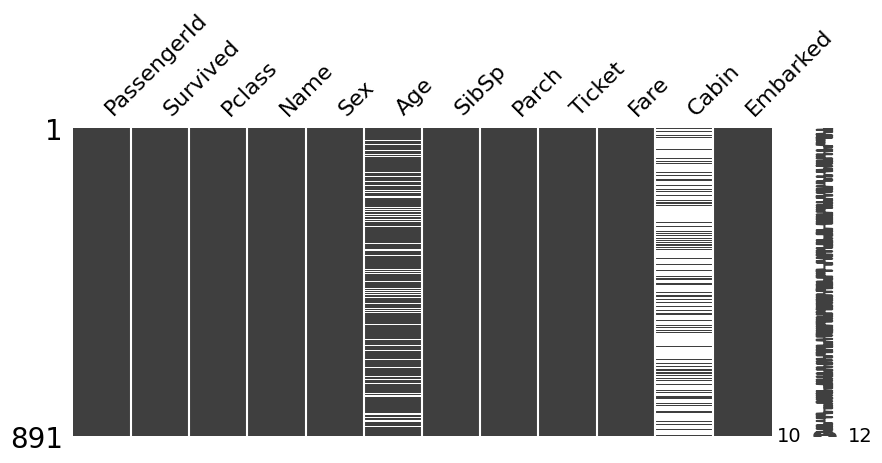

In [11]:
# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from a public URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print(df.head())
print("\nDataset Info:")
df.info()

# Visualize missing data using missingno (install if necessary)
!pip install missingno -q
import missingno as msno
msno.matrix(df, figsize=(10,4))
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


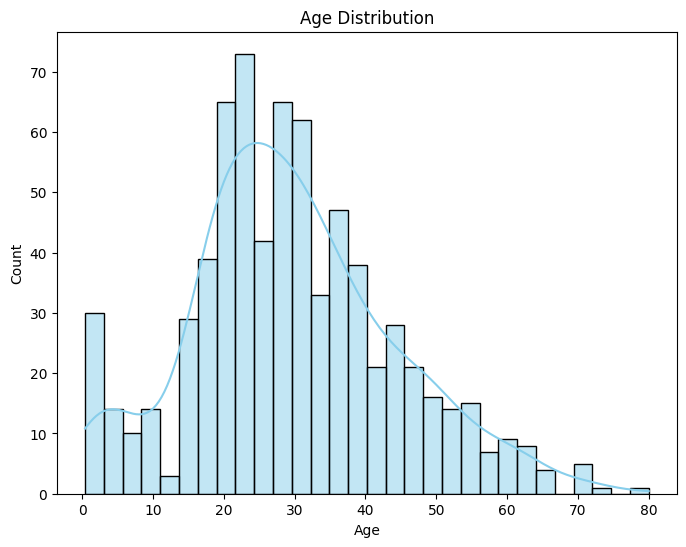

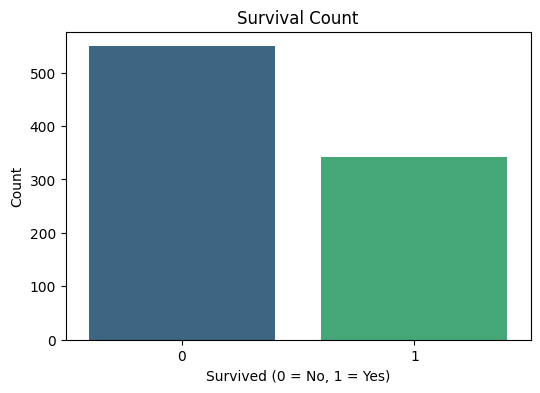

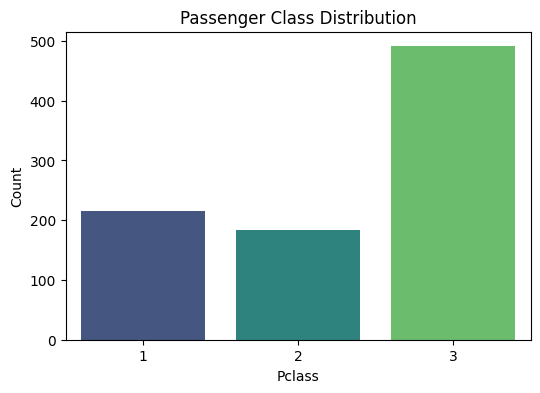

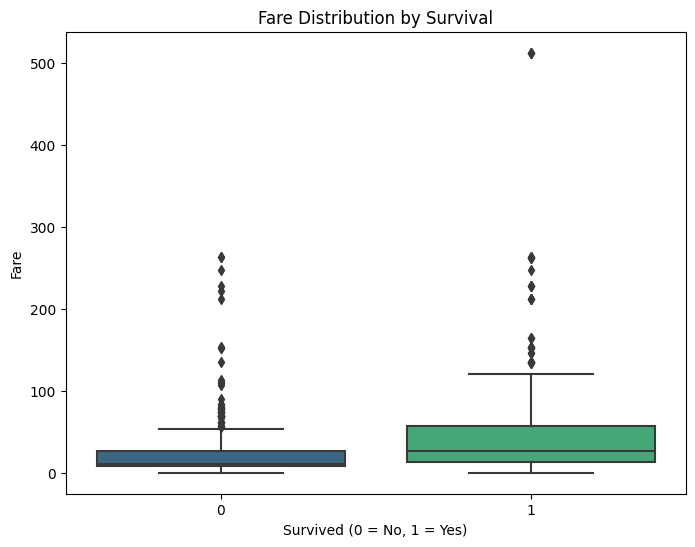

In [12]:
# %% [code]
# Age Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Passenger Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Fare Distribution by Survival
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


In [13]:
# %% [code]
from sklearn.impute import SimpleImputer

# Impute missing values for Age using median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Impute missing values for Embarked using mode (most frequent) and flatten the result
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

# Impute missing values for Fare using median (if any missing)
fare_imputer = SimpleImputer(strategy='median')
df['Fare'] = fare_imputer.fit_transform(df[['Fare']])

# Drop the Cabin column due to high missingness
df.drop(columns=['Cabin'], inplace=True)

# Feature Engineering: Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Simplify titles by grouping rarer ones
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

print("Unique Titles:", df['Title'].unique())
print(df.head())



Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize Title  
0      0         A/5 21171   7.2500        S           2    Mr  
1      0          PC 17599  71.2833        C           2   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1  Miss  
3      0 

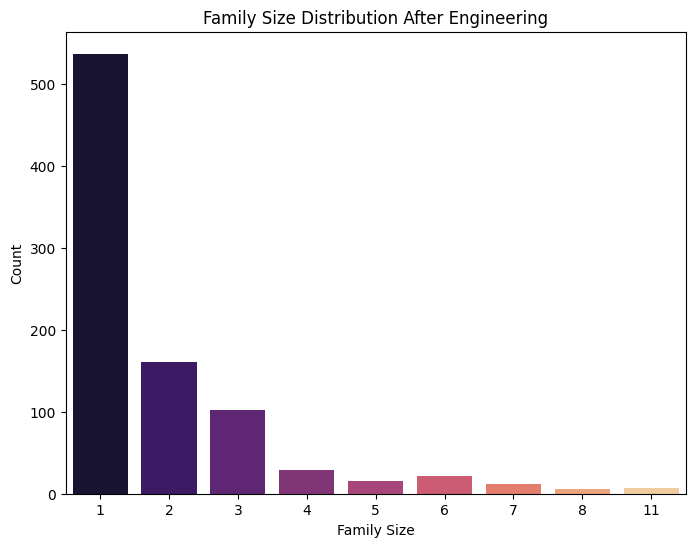

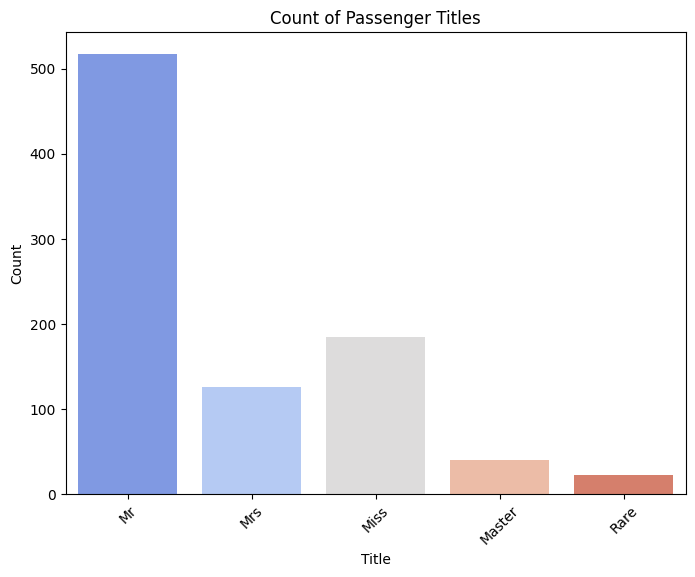

In [14]:
# %% [code]
# Distribution of Family Size
plt.figure(figsize=(8,6))
sns.countplot(x='FamilySize', data=df, palette='magma')
plt.title('Family Size Distribution After Engineering')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Count of Passenger Titles
plt.figure(figsize=(8,6))
sns.countplot(x='Title', data=df, palette='coolwarm')
plt.title('Count of Passenger Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-5bb1e3d1d5cd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Preprocessed Feature Sample:
   Pclass  Sex       Age      Fare  Embarked  FamilySize  Title
0       3    1 -0.565736 -0.502445         2    0.059160      2
1       1    0  0.663861  0.786845         0    0.059160      3
2       3    0 -0.258337 -0.488854         2   -0.560975      1
3       1    0  0.433312  0.420730         2    0.059160      3
4       3    1  0.433312 -0.486337         2   -0.560975      2


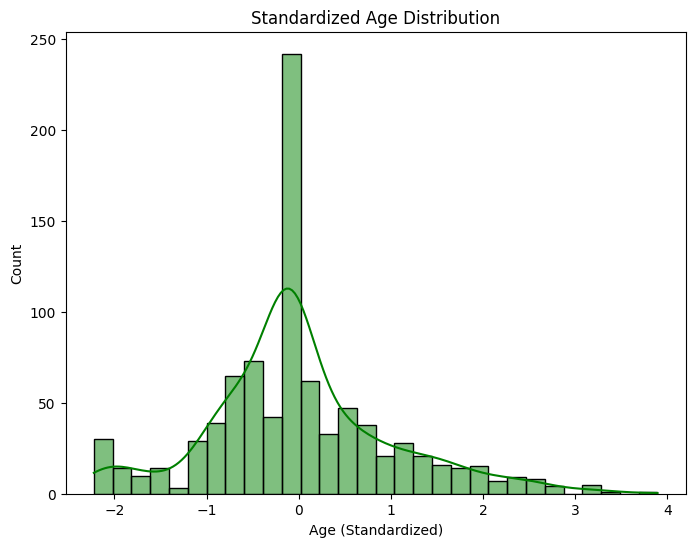

In [15]:
# %% [code]
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'Title']
target = 'Survived'

# Encode categorical features (Sex, Embarked, Title)
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Create feature matrix X and target vector y
X = df[features]
y = df[target]

# Standardize numerical features: Age, Fare, FamilySize
scaler = StandardScaler()
X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

print("Preprocessed Feature Sample:")
print(X.head())

# Visualize standardized Age distribution
plt.figure(figsize=(8,6))
sns.histplot(X['Age'], bins=30, kde=True, color='green')
plt.title('Standardized Age Distribution')
plt.xlabel('Age (Standardized)')
plt.show()


In [16]:
# %% [code]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


Test Accuracy: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



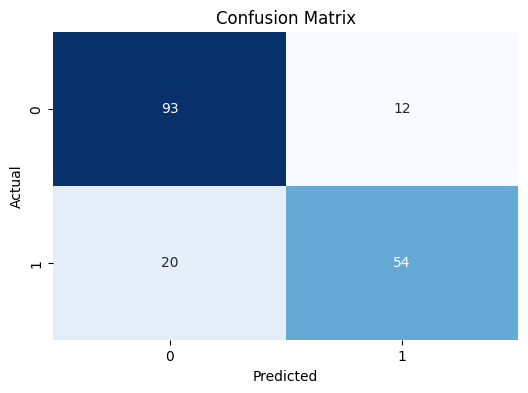

In [17]:
# %% [code]
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


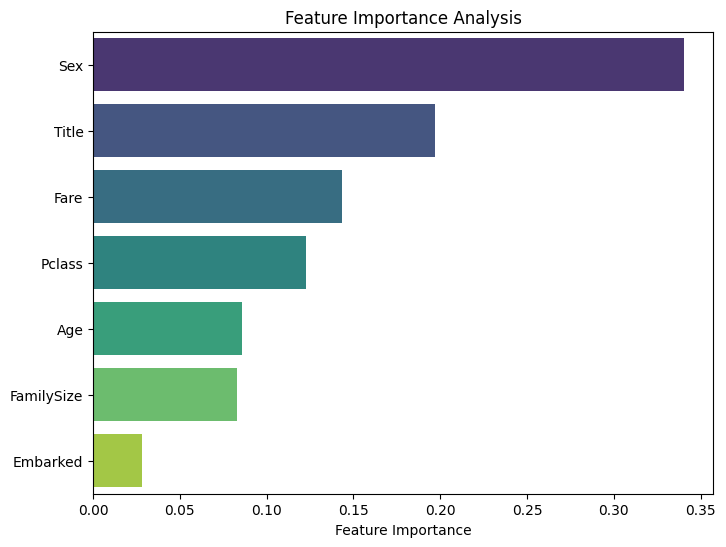

In [18]:
# %% [code]
# Extract feature importances from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()


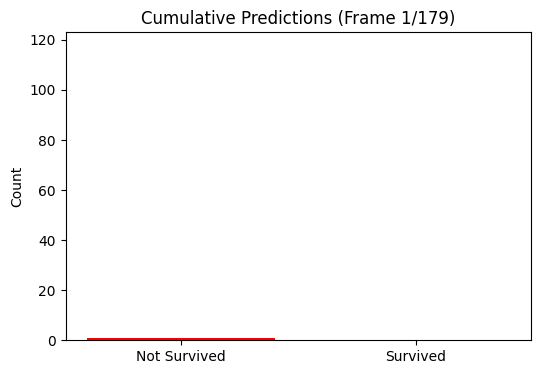

In [19]:
# %% [code]
import matplotlib.animation as animation
from IPython.display import HTML

# Convert predictions to a NumPy array
pred_array = np.array(y_pred)
n_frames = len(pred_array)

# Precompute cumulative counts for each frame
cumulative_survived = []
cumulative_not_survived = []

for i in range(n_frames):
    sub_preds = pred_array[:i+1]
    survived_count = np.sum(sub_preds)
    not_survived_count = (i+1) - survived_count
    cumulative_survived.append(survived_count)
    cumulative_not_survived.append(not_survived_count)

# Create the animation
fig, ax = plt.subplots(figsize=(6,4))

def animate(i):
    ax.clear()
    bars = ax.bar(['Not Survived', 'Survived'], 
                  [cumulative_not_survived[i], cumulative_survived[i]],
                  color=['red', 'green'])
    ax.set_ylim(0, max(cumulative_survived[-1], cumulative_not_survived[-1]) + 10)
    ax.set_title(f'Cumulative Predictions (Frame {i+1}/{n_frames})')
    ax.set_ylabel('Count')

ani = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, repeat=False)
HTML(ani.to_html5_video())
